<a href="https://colab.research.google.com/github/albivaltzew/Machine_learning_DC_ITMO/blob/main/Unit_8_decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df_in = pd.read_csv("diabetes.csv", delimiter=",",header = 0,)
df_in

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
df = df_in.head(670)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
665,1,112,80,45,132,34.8,0.217,24,0
666,4,145,82,18,0,32.5,0.235,70,1
667,10,111,70,27,0,27.5,0.141,40,1
668,6,98,58,33,190,34.0,0.430,43,0


In [ ]:
count = df[df.Outcome == 0]
len(count)

439

In [ ]:
X = df.drop("Outcome",axis= 1)
Y = df["Outcome"]
Y

0      1
1      0
2      1
3      0
4      1
      ..
665    0
666    1
667    1
668    0
669    0
Name: Outcome, Length: 670, dtype: int64

In [ ]:
X_train = X.loc[:len(X)*0.8, :]
X_test = X.loc[len(X)*0.8+1:, :]
Y_train = Y.loc[:len(Y)*0.8]
Y_test = Y.loc[len(Y)*0.8+1:]
Y_train

0      1
1      0
2      1
3      0
4      1
      ..
532    0
533    0
534    0
535    1
536    0
Name: Outcome, Length: 537, dtype: int64

In [ ]:
670*0.8

536.0

In [ ]:
clf = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=10, max_leaf_nodes=10, random_state=2020)

In [ ]:
clf.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=10,
                       min_samples_leaf=10, random_state=2020)

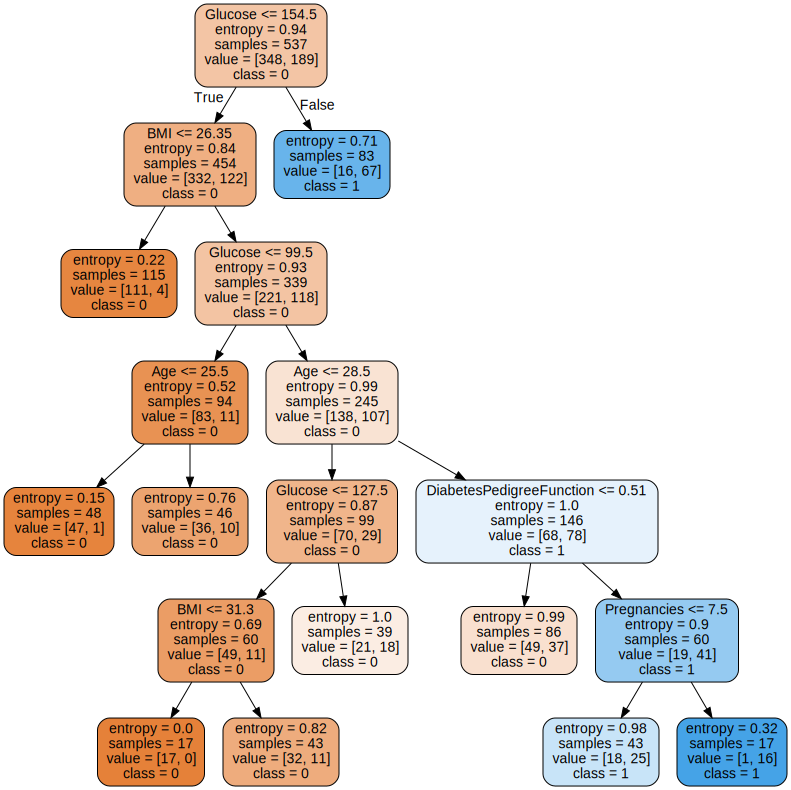

In [ ]:
from sklearn.tree import export_graphviz
import graphviz
columns = list(X_train.columns)
export_graphviz(clf, out_file='tree.dot', 
                feature_names=columns,
                class_names=['0', '1'],
                rounded = True, proportion = False, 
                precision = 2, filled = True, label='all')

with open('tree.dot') as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

In [ ]:
clf.get_depth()

6

In [ ]:
clf.predict(X_test)

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0])

In [ ]:
clf.score(X_test, Y_test)

0.8195488721804511

In [ ]:
from sklearn.metrics import f1_score
f1_score(Y_test, clf.predict(X_test), average='macro')

0.7753378378378377

In [ ]:
df1 = df_in.drop("Outcome",axis= 1)
df1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [ ]:
first = np.array(df1.loc[712])
clf.predict(first.reshape(1,-1))

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [ ]:
second = np.array(df1.loc[749])
clf.predict(second.reshape(1,-1))

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [ ]:
t = np.array(df1.loc[703])
clf.predict(t.reshape(1,-1))

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [ ]:
f = np.array(df1.loc[740])
clf.predict(f.reshape(1,-1))

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])